In [1]:
#!pip install nltk
#!pip install sklearn
#!pip install wordcloud
#!pip install plotly

In [134]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from ast import literal_eval
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
get_tokens_list = lambda x: literal_eval(x) if type(x) == str else []

nltk.download('popular')

link = "./rotten_tomatoes_critic_reviews_tokens.csv"
link2 ='./rotten_tomatoes_movies.csv'

critic_reviews = pd.read_csv(link, converters={'review_date': pd.to_datetime})
movies = pd.read_csv(link2, converters={'original_release_date': pd.to_datetime, 'streaming_release_date': pd.to_datetime})

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package movie_reviews is already

# Analyse with NLKT the consens comment

In [4]:
movies['critics_consensus'].fillna(" ", inplace=True)
movies['critics_consensus'].isna().sum()
stop_words = nltk.corpus.stopwords.words("english") + ['"', "'", "'s", "-", "_",",","--",".", "of", "the"]

In [5]:
# Get freq words from critics consensus
movies["X"] = movies[~movies['critics_consensus'].isna()]['critics_consensus'].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
freq = nltk.FreqDist(movies[~movies["X"].isna()]["X"].sum())

In [6]:
# Get freq clean words from critics consensus
movies["X_clean"] = movies[~movies["X"].isna()]["X"].apply(lambda tokens: \
                  [ w for w in tokens if w.lower() not in stop_words ])
freq_clean = nltk.FreqDist(movies[~movies["X"].isna()]["X_clean"].sum())

In [7]:
df_tokens = pd.DataFrame.from_dict(freq, orient='index')
df_tokens.columns = ['Frequency']
df_tokens.index.name = 'Term'

In [8]:
df_words = pd.DataFrame.from_dict(freq_clean, orient='index')
df_words.columns = ['Frequency']
df_words.index.name = 'Term'

In [9]:
porter = PorterStemmer()
movies["X_stem"] = movies[~movies["X_clean"].isna()]["X_clean"].apply(lambda words: [porter.stem(word.lower()) for word in words] )
# change to dataFrame to see better final results
df_stem = pd.DataFrame.from_dict(nltk.FreqDist(movies[~movies["X_stem"].isna()]["X_stem"].sum()), orient='index')
df_stem.columns = ['Frequency']
df_stem.index.name = 'Term'

In [10]:
wnl = WordNetLemmatizer()
movies["X_lem"] = movies[~movies["X_clean"].isna()]["X_clean"].apply(lambda words: [wnl.lemmatize(word.lower()) for word in words] )
df_lem = pd.DataFrame.from_dict(nltk.FreqDist(movies[~movies["X_lem"].isna()]["X_lem"].sum()), orient='index')
df_lem.columns = ['Frequency']
df_lem.index.name = 'Term'

[Text(0.5, 1.0, 'Lemmatized text')]

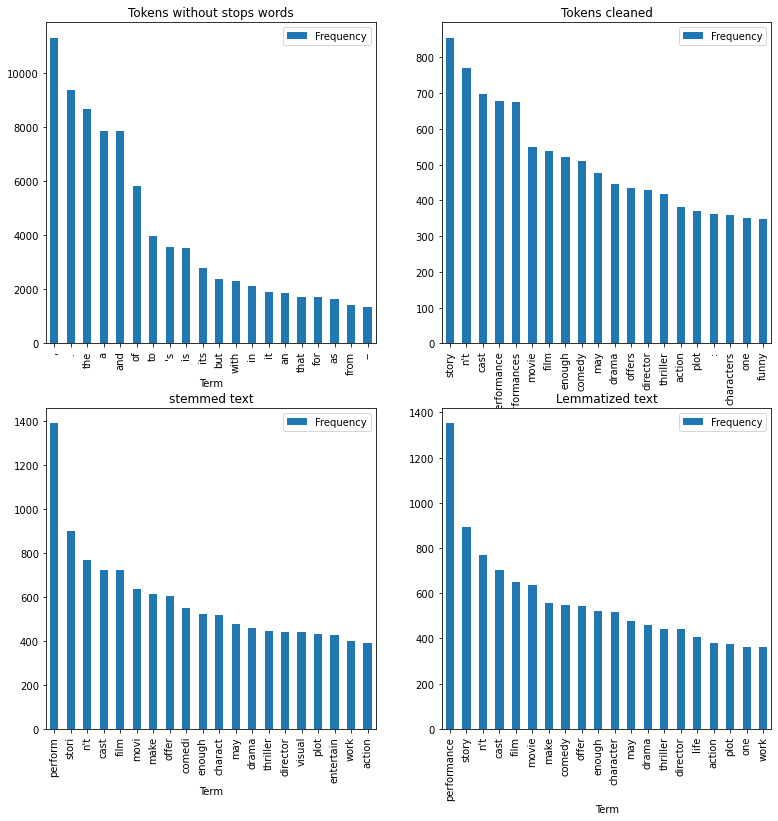

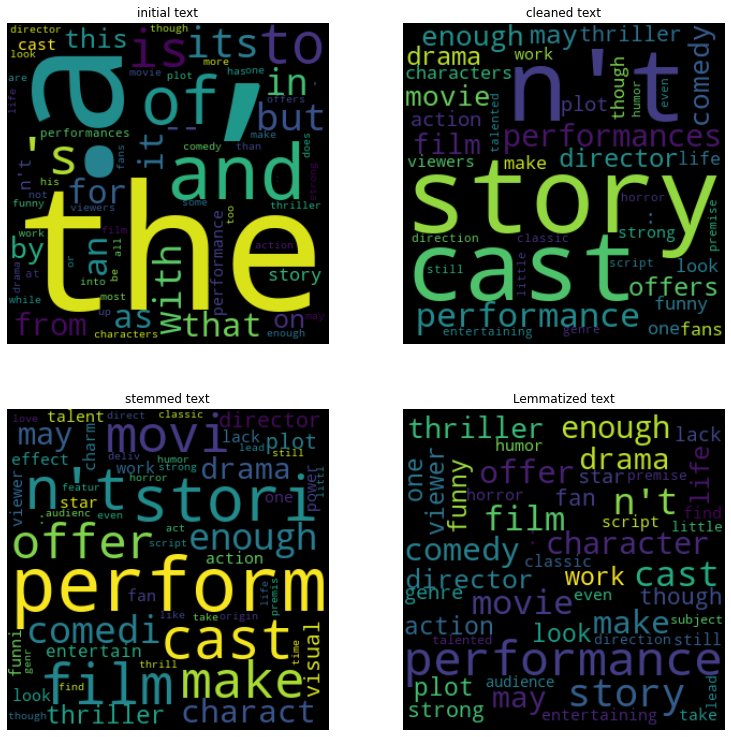

In [11]:
fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#initial text
df_tokens.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax1)
ax1.set(title="Tokens without stops words")

#after cleaning up stopwords and punctuation
df_words.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax2)
ax2.set(title="Tokens cleaned")

#cleaning up stopwords and punctuation + stemmer
df_stem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax3)
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
df_lem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax4)
ax4.set(title="Lemmatized text")

fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#initial text
wordcloud1 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud1.generate_from_frequencies(freq)

ax1.imshow(wordcloud1, interpolation="bilinear")
ax1.axis('off')
ax1.set(title="initial text")
plt.margins(x=0, y=0)

#after cleaning up stopwords and punctuation
wordcloud2 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud2.generate_from_frequencies(freq_clean)

ax2.imshow(wordcloud2, interpolation="bilinear")
ax2.axis('off')
ax2.set(title="cleaned text")

#cleaning up stopwords and punctuation + stemmer
wordcloud3 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud3.generate_from_frequencies(nltk.FreqDist(movies[~movies["X_stem"].isna()]["X_stem"].sum()))

ax3.imshow(wordcloud3, interpolation="bilinear")
ax3.axis('off')
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
wordcloud4 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud4.generate_from_frequencies(nltk.FreqDist(movies[~movies["X_lem"].isna()]["X_lem"].sum()))

ax4.imshow(wordcloud4, interpolation="bilinear")
ax4.axis('off')
ax4.set(title="Lemmatized text")

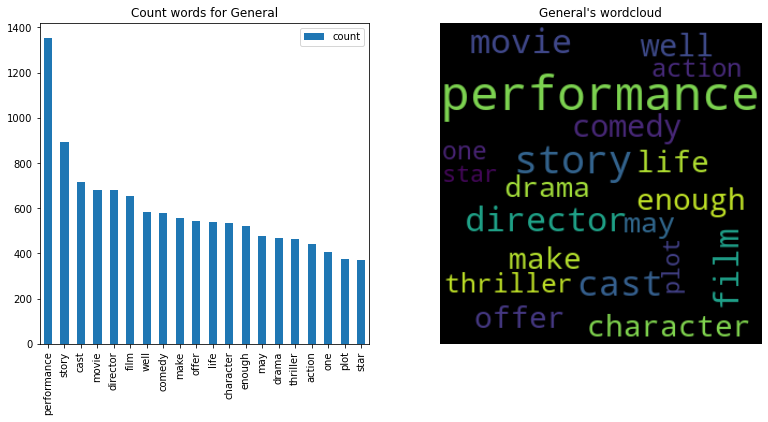

In [12]:
# Create a matrix with vectorise & TF - IDF of any alpha word longer than 2 caracters
def get_count(X, name = "", max_features=20):
    
    vectorizer = CountVectorizer(max_features=max_features, stop_words=stop_words )
    text_matrix = vectorizer.fit_transform(X)

    df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    df_sum_matrix_neg = pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])
    
    
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    ax1.set(title=f"Count words for {name}")
    df_sum_matrix_neg.plot(kind="bar", ax = ax1)

    #initial text
    wordcloud_neg = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
    wordcloud_neg.generate_from_frequencies(df_matrix_neg.sum())

    ax2.imshow(wordcloud_neg, interpolation="bilinear")
    ax2.axis('off')
    ax2.set(title=f"{name}'s wordcloud")
    plt.margins(x=0, y=0)    

X = movies[~movies["X_lem"].isna()]["X_lem"].apply(lambda wlist: " ".join(wlist))

get_count(X, name = "General")

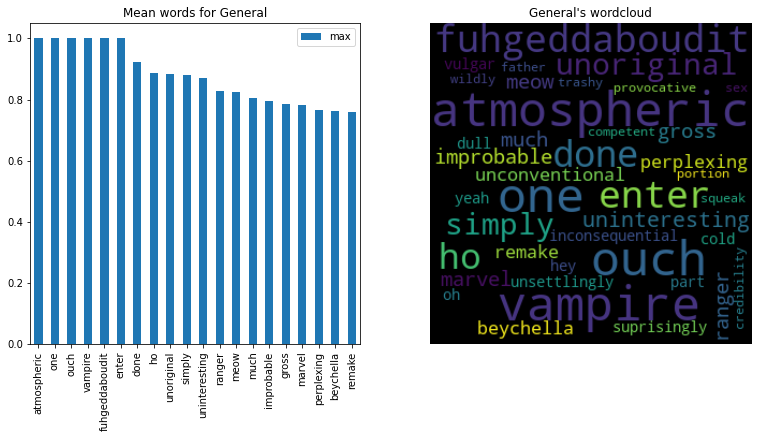

In [13]:
def get_tfidf(X, name = ""):
    tfidf = TfidfVectorizer(token_pattern = "[a-zA-Z]+", stop_words=stop_words)

    #tfidf.fit(X.values)
    text_matrix_tfidf = tfidf.fit_transform(X)
    
    #return text_matrix_tfidf.toarray().shape
    
    df_matrix_tf_idf = pd.DataFrame(text_matrix_tfidf.toarray(), columns = tfidf.get_feature_names_out())
    df_max_tf_idf = pd.DataFrame(df_matrix_tf_idf.max(), columns = ["max"])
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    wordcloud = WordCloud(width=300, height=300, max_font_size=50, min_font_size=10)
    wordcloud.generate_from_frequencies(df_matrix_tf_idf.max().sort_values(ascending=False).head(40))

    ax2.imshow(wordcloud, interpolation="bilinear")
    ax2.axis('off')
    plt.margins(x=0, y=0)

    df_max_tf_idf.sort_values("max", ascending=False).head(20).plot(kind="bar", ax = ax1)
    
    ax1.set(title=f"Mean words for {name}")
    ax2.set(title=f"{name}'s wordcloud")
    
X = movies["X_lem"].apply(lambda wlist: " ".join(wlist))
get_tfidf(X, name = "General")


# Most frequent words depend of tomatometer status


In [14]:
#X = movies[(~movies["X_lem"] movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))    
#get_count(X, "Rotten")

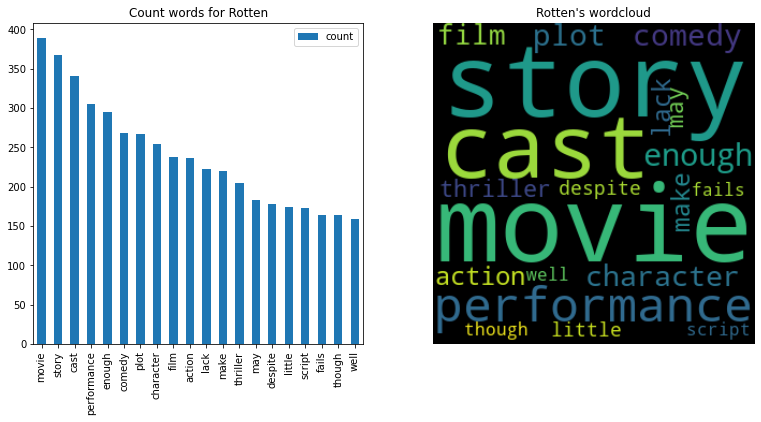

In [15]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))    
get_count(X, "Rotten")
#get_tfidf(X, name = "Rotten")

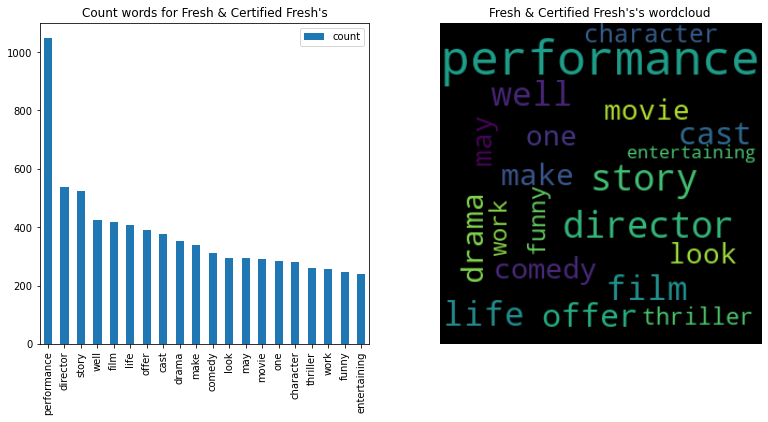

In [16]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] != "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
get_count(X, "Fresh & Certified Fresh's")
#get_tfidf(X, "Fresh & Certified Fresh's")

# Count & TF IDF per genre

/var/folders/ts/l4jvqvn135g1lpkckf7t5cmc0000gn/T/ipykernel_2846/1794811837.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize=(13,13))


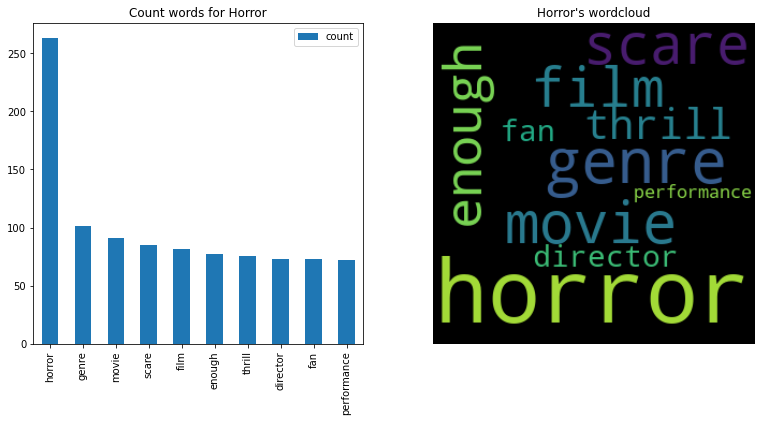

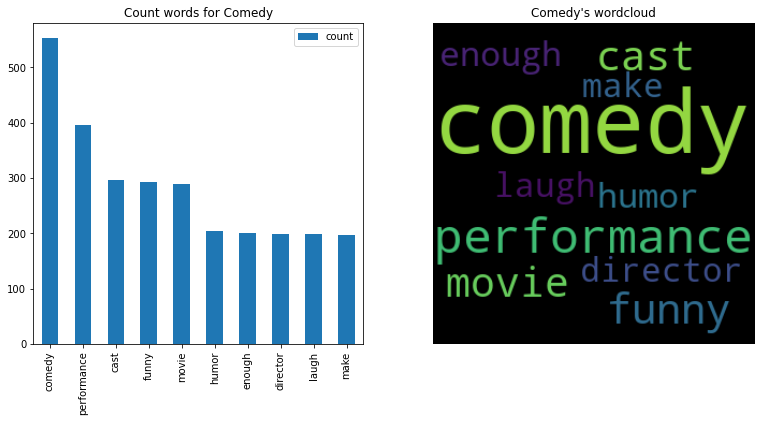

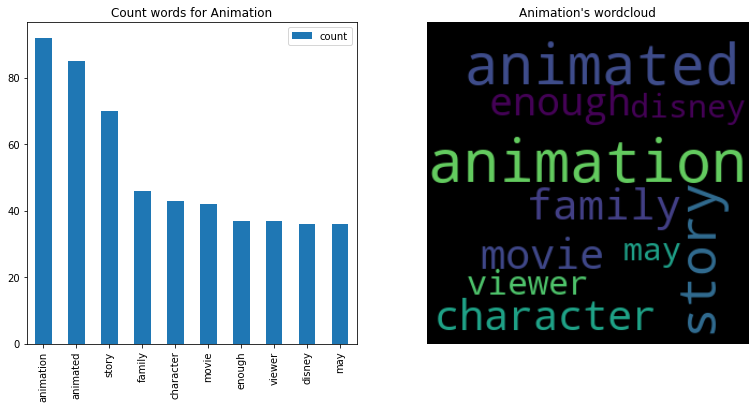

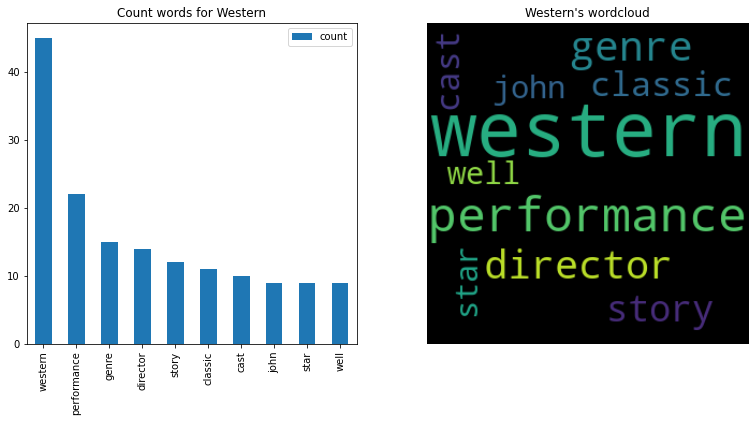

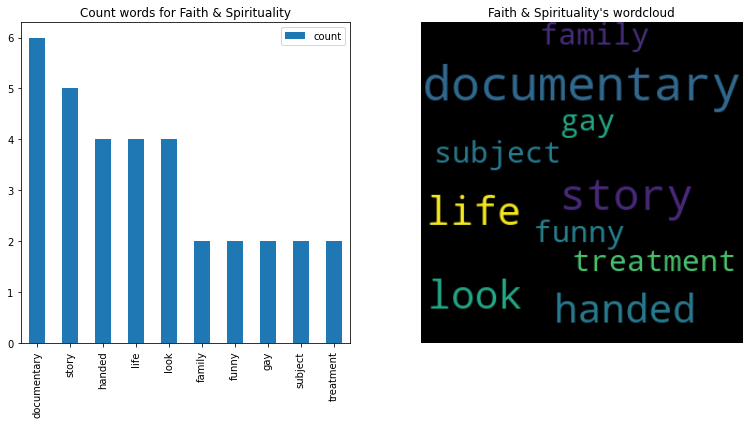

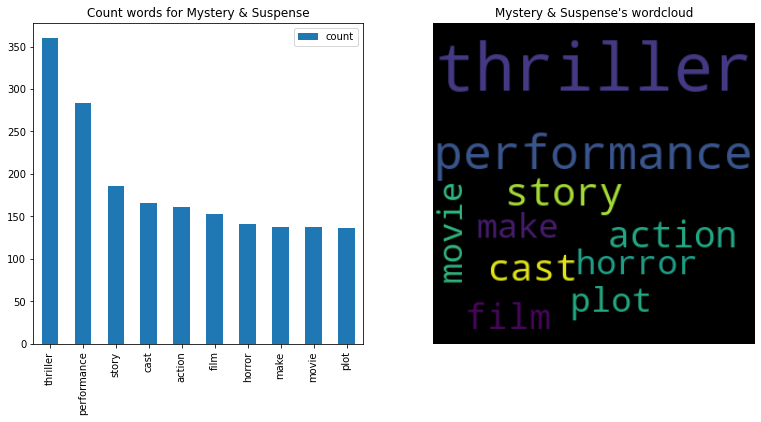

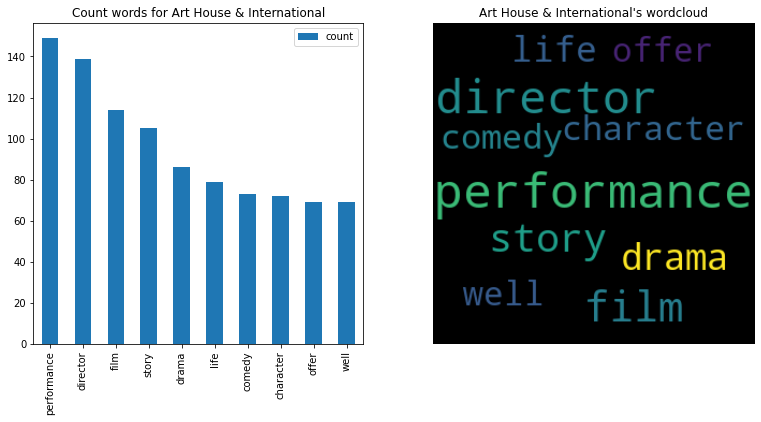

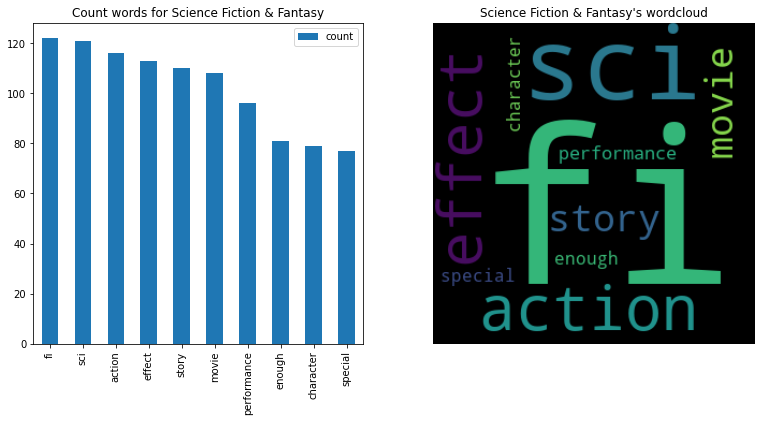

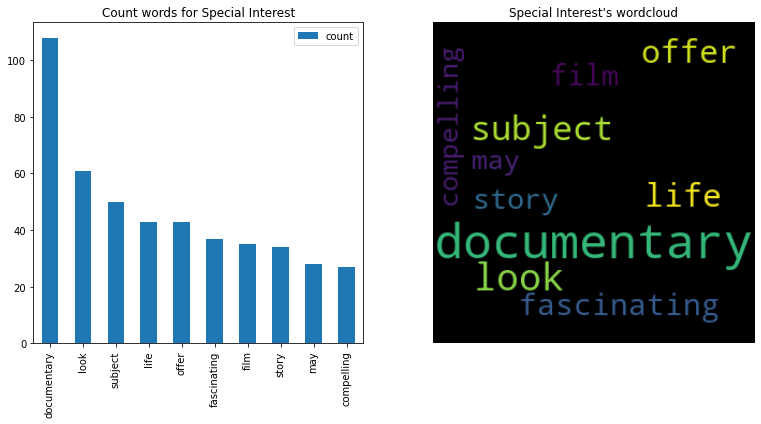

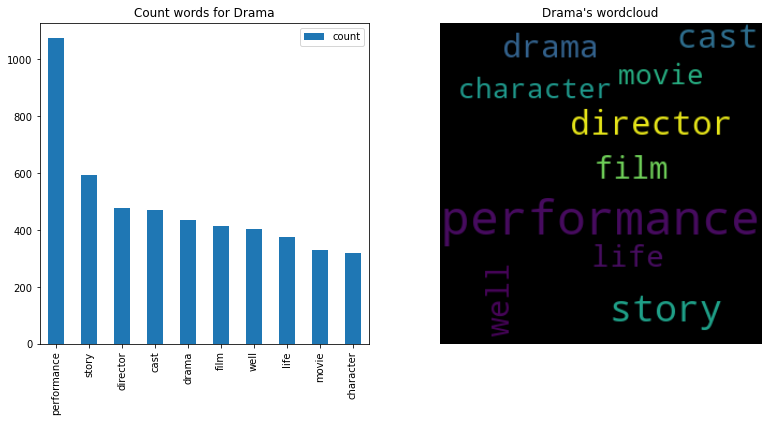

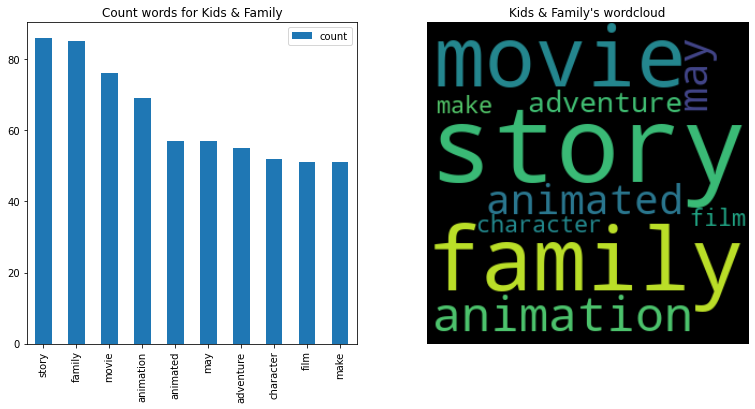

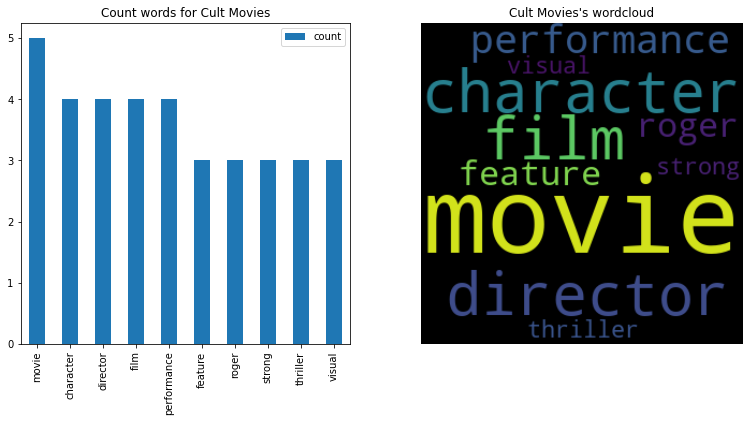

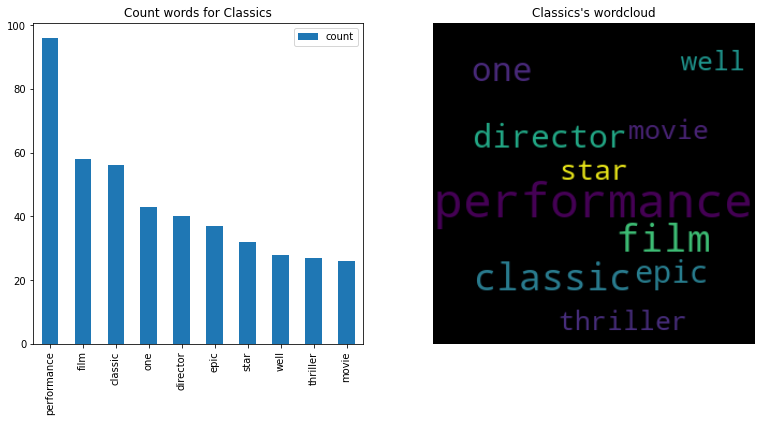

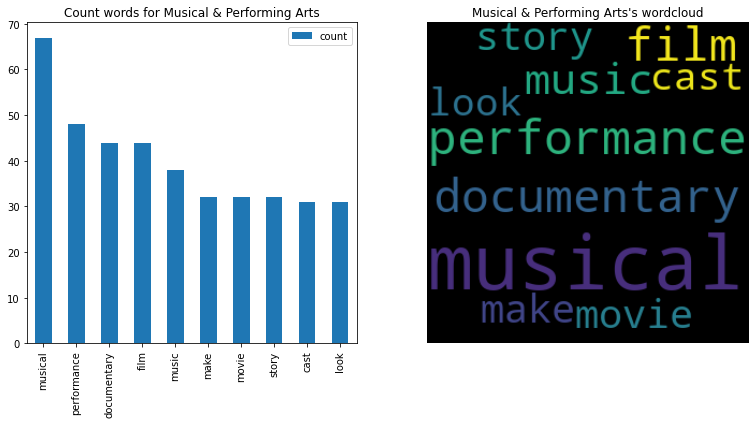

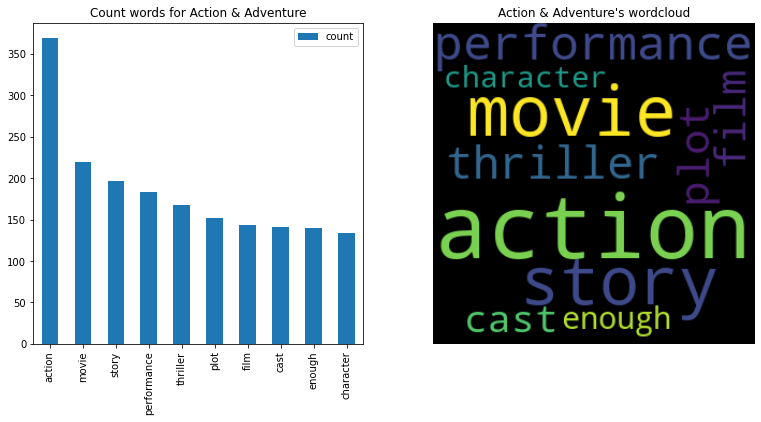

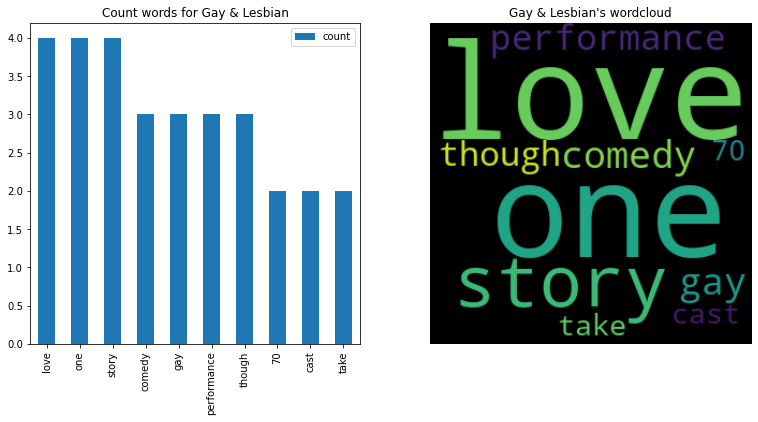

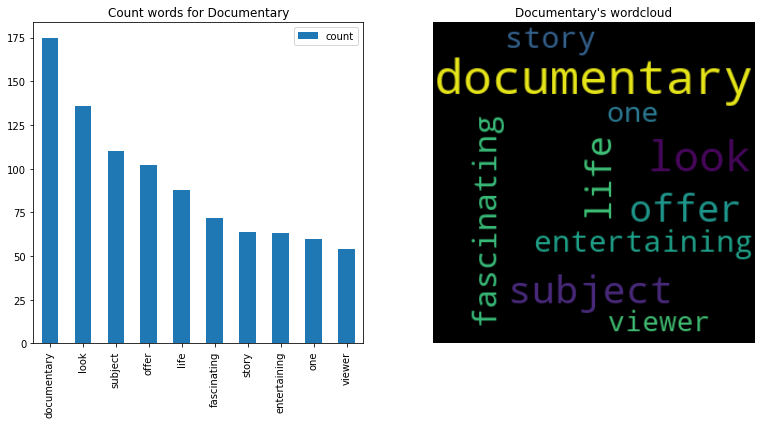

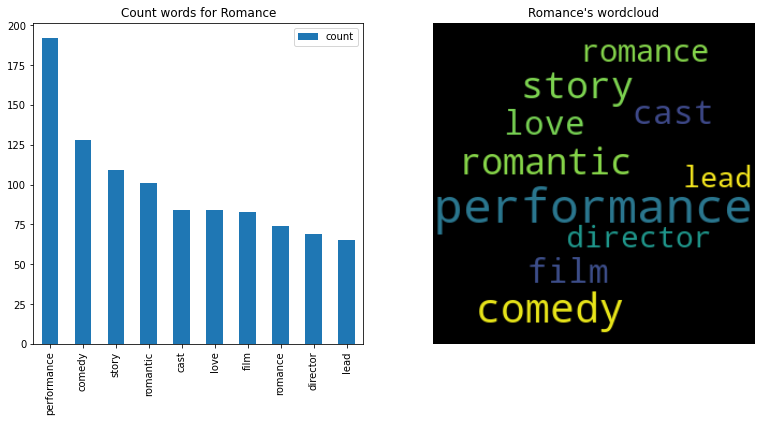

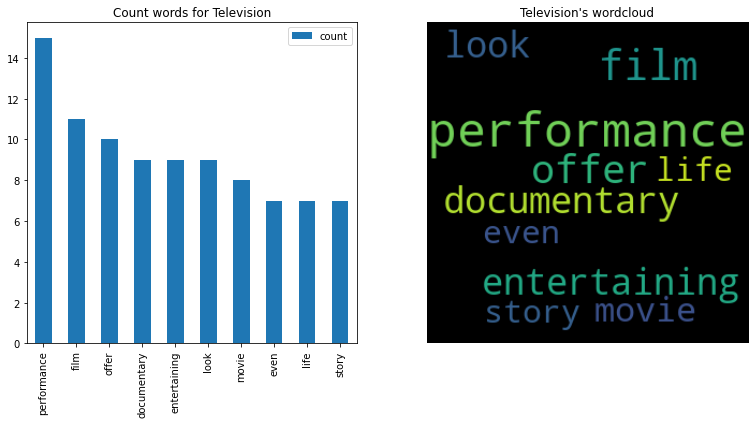

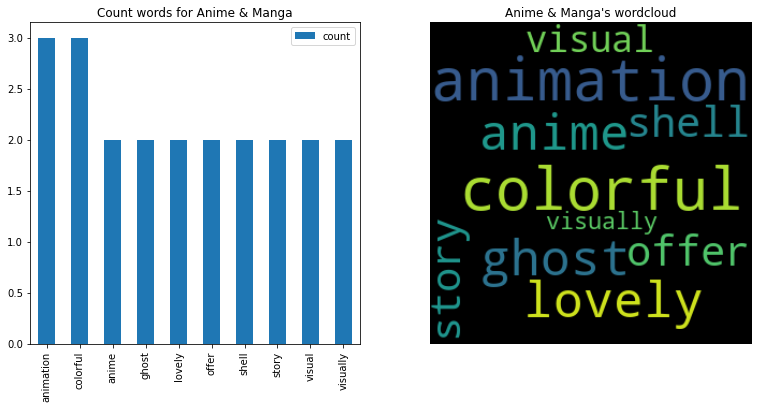

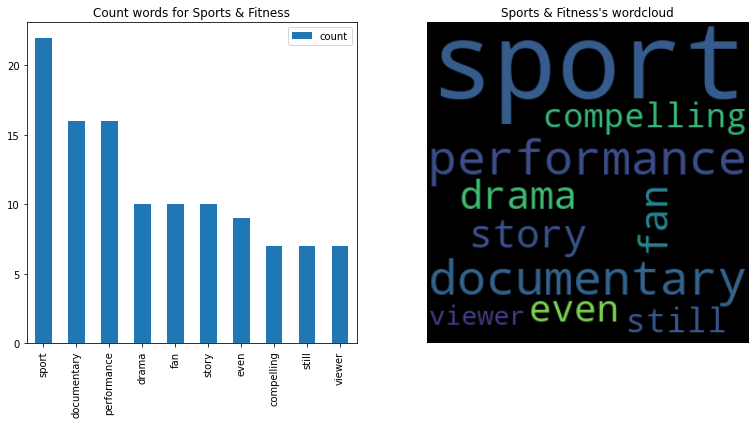

In [30]:
to_list = lambda string: string.split(", ") if type(string) == str else []

list_genres = set(movies[~movies["genres"].isna()]["genres"].apply(to_list).sum())
df_movies_explodes = movies.explode(["genres"])
for genre in list_genres:
    X = df_movies_explodes[(~df_movies_explodes["X_lem"].isna()) & (df_movies_explodes["genres"].str.contains(genre))]["X_lem"].apply(lambda wlist: " ".join(wlist))
    get_count(X, genre, 10)
    #get_tfidf(X, genre) 

# Use confusion matrix and models


I just write this code to do some tests
First I get the general list but I will focus on movies with status "rotten" or not

In [18]:

X = movies[(~movies["X_lem"].isna())]["X_lem"].apply(lambda wlist: " ".join(wlist))
vectorizer = CountVectorizer(stop_words=stop_words )
text_matrix = vectorizer.fit_transform(X)

df_matrix_gen = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
#pd.DataFrame(df_matrix_gen.sum().sort_values(ascending=False), columns = ["count"])

In [19]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] != "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
vectorizer = CountVectorizer(stop_words= stop_words )
text_matrix = vectorizer.fit_transform(X)

df_matrix_pos = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
pd.DataFrame(df_matrix_pos.sum().sort_values(ascending=False), columns = ["count"])

,count
performance,1048
director,538
story,525
well,424
film,417
...,...
institution,1
instantly,1
insomnia,1
insidious,1


The following table is a list of words specific to "rotten" movies


In [20]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
vectorizer = CountVectorizer(stop_words= stop_words )
text_matrix = vectorizer.fit_transform(X)


df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])

,count
movie,389
story,368
cast,341
performance,305
enough,295
...,...
immortal,1
immigrant,1
immense,1
immediate,1


I created a formula to compare the frequency of the word in rotten vs not rotten movies in a table base on general.

In [95]:
word_freq = pd.concat([df_matrix_pos.sum(), df_matrix_neg.sum(), df_matrix_gen.sum()], axis=1)
word_freq.columns = ["Fresh", "Rotten", "General"]
word_freq["freq_fresh"] = (word_freq["Fresh"] / word_freq["General"].sum())*100
word_freq["freq_rot"] = (word_freq["Rotten"] / word_freq["General"].sum())*100
word_freq["freq_total"] = (word_freq["General"] / word_freq["General"].sum())*100
word_freq["rel_fresh"] = (word_freq["Fresh"] / word_freq["Fresh"].sum())*100
word_freq["rel_rot"] = (word_freq["Rotten"] / word_freq["Rotten"].sum())*100
word_freq=word_freq.fillna(0)

In [53]:
word_freq["General"].sum()

131495.0

In [54]:
word_freq["Fresh"].sum()

81463.0

In [55]:
word_freq.sum()

Fresh          81463.0
Rotten         57597.0
General       131495.0
freq_total       100.0
rel_fresh        100.0
rel_rot          100.0
dtype: float64

In [86]:
word_freq[word_freq.General > 400].describe()

,Fresh,Rotten,General,freq_total,rel_fresh,rel_rot
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,387.333333,229.500000,616.833333,0.469093,0.475471,0.398458
std,188.595739,85.196831,218.144919,0.165896,0.231511,0.147919
min,207.000000,119.000000,408.000000,0.310278,0.254103,0.206608
25%,286.000000,153.000000,488.250000,0.371307,0.351080,0.265639
50%,345.000000,228.500000,550.500000,0.418647,0.423505,0.396722
75%,414.250000,288.250000,673.000000,0.511807,0.508513,0.500460
max,1048.000000,389.000000,1353.000000,1.028936,1.286474,0.675382


In [92]:
word_freq[(word_freq.freq_total > 0.4)].sort_values(["rel_fresh"], ascending=[0]).head(10)




,Fresh,Rotten,General,freq_total,rel_fresh,rel_rot
performance,1048.0,305.0,1353.0,1.028936,1.286474,0.529541
director,538.0,141.0,679.0,0.516369,0.660423,0.244804
story,525.0,368.0,893.0,0.679113,0.644464,0.638922
well,424.0,159.0,583.0,0.443363,0.520482,0.276056
film,417.0,238.0,655.0,0.498118,0.511889,0.413216
life,406.0,135.0,541.0,0.411422,0.498386,0.234387
offer,391.0,151.0,542.0,0.412183,0.479973,0.262166
cast,377.0,341.0,718.0,0.546028,0.462787,0.592045
make,339.0,220.0,559.0,0.425111,0.416140,0.381964
comedy,313.0,268.0,581.0,0.441842,0.384224,0.465302


In [103]:
word_freq[(word_freq.freq_total > 0.4)].sort_values(["rel_rot"], ascending=[0]).head(10)


,Fresh,Rotten,General,freq_fresh,freq_rot,freq_total,rel_fresh,rel_rot
movie,292.0,389.0,681.0,0.222062,0.295829,0.517890,0.358445,0.675382
story,525.0,368.0,893.0,0.399255,0.279859,0.679113,0.644464,0.638922
cast,377.0,341.0,718.0,0.286703,0.259325,0.546028,0.462787,0.592045
performance,1048.0,305.0,1353.0,0.796988,0.231948,1.028936,1.286474,0.529541
comedy,313.0,268.0,581.0,0.238032,0.203810,0.441842,0.384224,0.465302
character,279.0,254.0,533.0,0.212175,0.193163,0.405339,0.342487,0.440995
film,417.0,238.0,655.0,0.317122,0.180995,0.498118,0.511889,0.413216
make,339.0,220.0,559.0,0.257804,0.167307,0.425111,0.416140,0.381964
well,424.0,159.0,583.0,0.322446,0.120917,0.443363,0.520482,0.276056
offer,391.0,151.0,542.0,0.297350,0.114833,0.412183,0.479973,0.262166


In [117]:

list_idx = np.append(word_freq[(word_freq.freq_total > 0.4)].sort_values(["rel_rot"], ascending=[0]).head(10).index,
word_freq[(word_freq.freq_total > 0.4)].sort_values(["rel_fresh"], ascending=[0]).head(10).index)

list_idx = np.unique(list_idx)

In [139]:
#word_freq[word_freq.index.isin(list_idx)].reset_index()[["index","freq_fresh", "freq_rot", "freq_total"]]\
#.plot(kind="bar", x="index", figsize=(10, 8), title="Frequency of words in Rotten movies and fresh movies vs general",\
#      palettes = {"freq_fresh":"green", "freq_rot":"red", "freq_total": "blue"})

fig = px.bar(word_freq[word_freq.index.isin(list_idx)].reset_index(), x='index', y=["freq_fresh", "freq_rot"], title="Wide-Form Input")
fig.show()

Then I assign a flag for film rotten or not to compare the 2 lists of movies rotten or not

In [26]:
df_matrix_neg["is_rotten"] = 1
df_matrix_neg.shape

(7565, 9294)

In [27]:
df_matrix_pos["is_rotten"] = 0
df_matrix_pos.shape

(10147, 12492)

In [28]:
 df_matrix_neg.shape[0] + df_matrix_pos.shape[0]

17712

In [31]:
df_matrix_pos_neg = pd.concat([df_matrix_pos["is_rotten"], df_matrix_neg], ignore_index=True).fillna(0)
df_matrix_pos_neg.drop(0, axis=1, inplace=True)

In [32]:
df_matrix_pos_neg["is_rotten"].value_counts()

0.0    10147
1.0     7565
Name: is_rotten, dtype: int64

In [ ]:
#df_matrix_pos_neg.info()

I use what we see about the quest of KNN to create a model of prediction based on the content of the words

I also created method to test different models and results

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
y = df_matrix_pos_neg["is_rotten"].apply(lambda x : "Rotten" if x == 0 else "Not rotten")
X = df_matrix_pos_neg.loc[:, ~df_matrix_pos_neg.columns.str.contains("is_rotten")]

#X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state = 55)

#pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_valence.predict(X_test)),
 #           index = model_valence.classes_ + " ACTUAL",
  #         columns = model_valence.classes_ + " PREDICTED")



In [36]:
model_valence = KNeighborsClassifier(n_neighbors=2, weights="distance")
model_valence.fit(X_train, y_train)
print("train's score:",model_valence.score(X_train, y_train))
print("test's score:",model_valence.score(X_test, y_test))

train's score: 0.7780788919000301
test's score: 0.5946251129177959


In [37]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_valence.predict(X_test)),
            index = model_valence.classes_ + " ACTUAL",
            columns = model_valence.classes_ + " PREDICTED")


,Not rotten PREDICTED,Rotten PREDICTED
Not rotten ACTUAL,79,1795
Rotten ACTUAL,0,2554


In [39]:
#my_data = 
#print(model_valence.predict(my_data))
print(classification_report(y_test, model_valence.predict(X_test)))

              precision    recall  f1-score   support

  Not rotten       1.00      0.04      0.08      1874
      Rotten       0.59      1.00      0.74      2554

    accuracy                           0.59      4428
   macro avg       0.79      0.52      0.41      4428
weighted avg       0.76      0.59      0.46      4428

